<a href="https://colab.research.google.com/github/husthorng/Backpropagation_NN/blob/main/GA20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1121husthorng a
from google.colab import drive
drive.mount('/content/drive')
#df = pd.DataFrame(output_V)
#df.to_csv("output_V.csv")

Mounted at /content/drive


[望大 望小 望目](https://www.clspaces.com/work_post/taguchi_sn.html)

1121husthorng


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

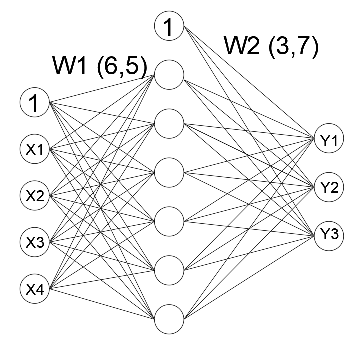

https://drive.google.com/file/d/1zHIdRuXDRX4IyRfxVMzbWVtNZHD6iQ0r/view?usp=drive_link

In [14]:
import pandas as pd
import numpy as np
url ="/content/drive/MyDrive/Colab Notebooks/BP/W1.csv"
W1 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
url ="/content/drive/MyDrive/Colab Notebooks/BP/W2.csv"
W2 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
url ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi.csv"
max_min_Xi = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
hidden_node=W1.shape[0]
Ninput=W1.shape[1]-1  #W1.shape (6,5) Ninput=4                                           Ninput=4 輸入 4
numTag=W2.shape[0]  #W2.shape (3,7)  numTag=3                                           numTag=3 輸出 3



def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))


#sigmoid https://zh.wikipedia.org/zh-tw/S%E5%9E%8B%E5%87%BD%E6%95%B0


genNr =90000 ; #93000;      Number of generations
npop = 30;

In [18]:
#
#W1.shape
W2.shape
#max_min_Xi #[最大][最小]
#W2
max_min_Xi

array([[3.60000000e+02, 5.00000000e-01, 1.28000000e+02, 5.50000000e-01,
        5.04210000e+01, 9.95967100e+02, 8.18226703e+01],
       [1.80000000e+02, 3.00000000e-01, 6.40000000e+01, 3.50000000e-01,
        3.17882400e+01, 6.98213900e+02, 5.83464421e+01]])

In [16]:
### 載入data4X3y_NQ.csv 使用W1 W2 計算 結果
#https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv
ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/main/data4X3y_NQ.csv"
records = pd.read_csv(ur2,encoding='utf-8')
Xi1=records.iloc[0:records.shape[0]].values
#numTag=3
max_min_Xi=np.array([list(np.max(Xi1,axis=0)),list(np.min(Xi1,axis=0))])
ptp_Xi=np.ptp(max_min_Xi,axis=0)
NXi=(Xi1 - np.min(Xi1,axis=0))/ptp_Xi
Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values
###

In [17]:
records

,NL,ND,QL,QD,Ti,Te,TT
0,234,0.34,115,0.37,47.39592,943.3549,78.110003
1,342,0.36,128,0.35,49.78776,927.1515,80.236923
2,270,0.46,102,0.45,42.80460,884.0905,72.538259
3,270,0.30,115,0.37,46.89600,912.7029,77.106973
4,198,0.48,90,0.51,39.55464,876.7707,69.164954
...,...,...,...,...,...,...,...
295,216,0.34,109,0.37,46.22088,937.0069,76.831448
296,306,0.34,77,0.45,36.37968,763.8845,64.018141
297,198,0.38,102,0.37,44.97084,936.8529,75.578893
298,216,0.40,115,0.47,45.58788,933.1499,76.135382


# [[NL	ND	QL	QD	Ti	Te]](https://drive.google.com/file/d/12v-3GiC5hTR_f22Hm09vTzUeO6wNH9p0/view?usp=drive_link)

In [ ]:

Ti=50.25;  #Ti目標值
Te=800;   #Te目標值
#[NL	ND	QL	QD	Ti	Te]
NTi=(Ti-max_min_Xi[1][4])/(max_min_Xi[0][4]-max_min_Xi[1][4]);                   #Ti 正規化  (32.25-31.788)/(50.42-31.788)= 0.02478215787677197
NTe=(Te-max_min_Xi[1][5])/(max_min_Xi[0][5]-max_min_Xi[1][5]);                   #Te 正規化  (800-698.21)/(995.96-698.21)=0.3418472076874406
ptp_Xi=np.ptp(max_min_Xi,axis=0)                                  #np.ptp [最大]-[最小]
Nmax_min=(max_min_Xi- np.min(max_min_Xi,axis=0))/ptp_Xi
print(NTe)

0.3418472076874406


[GAFN.XLS](https://docs.google.com/spreadsheets/d/1C5C6ORNFtbMYucffBg6JZsp0i7bxNZMWeJax6YZtuFs/edit?gid=448974567#gid=448974567)

In [19]:
Ti=50.25;  #Ti目標值
Te=800;   #Te目標值
Tt=70;
#[NL	ND	QL	QD	Ti	Te Tt]
Value_search=[0,0,0,0,Ti,Te,Tt]
NormValue=(Value_search-max_min_Xi[1][:])/np.ptp(max_min_Xi,axis=0) # 正規化

NTi=NormValue[4]
NTe=NormValue[5]
NTt=NormValue[6]
print(NTi,NTe,NTt)



0.9908226156511435 0.3418472076874406 0.49639821911732973


[GAFN.XLS](https://docs.google.com/spreadsheets/d/1C5C6ORNFtbMYucffBg6JZsp0i7bxNZMWeJax6YZtuFs/edit?gid=448974567#gid=448974567)

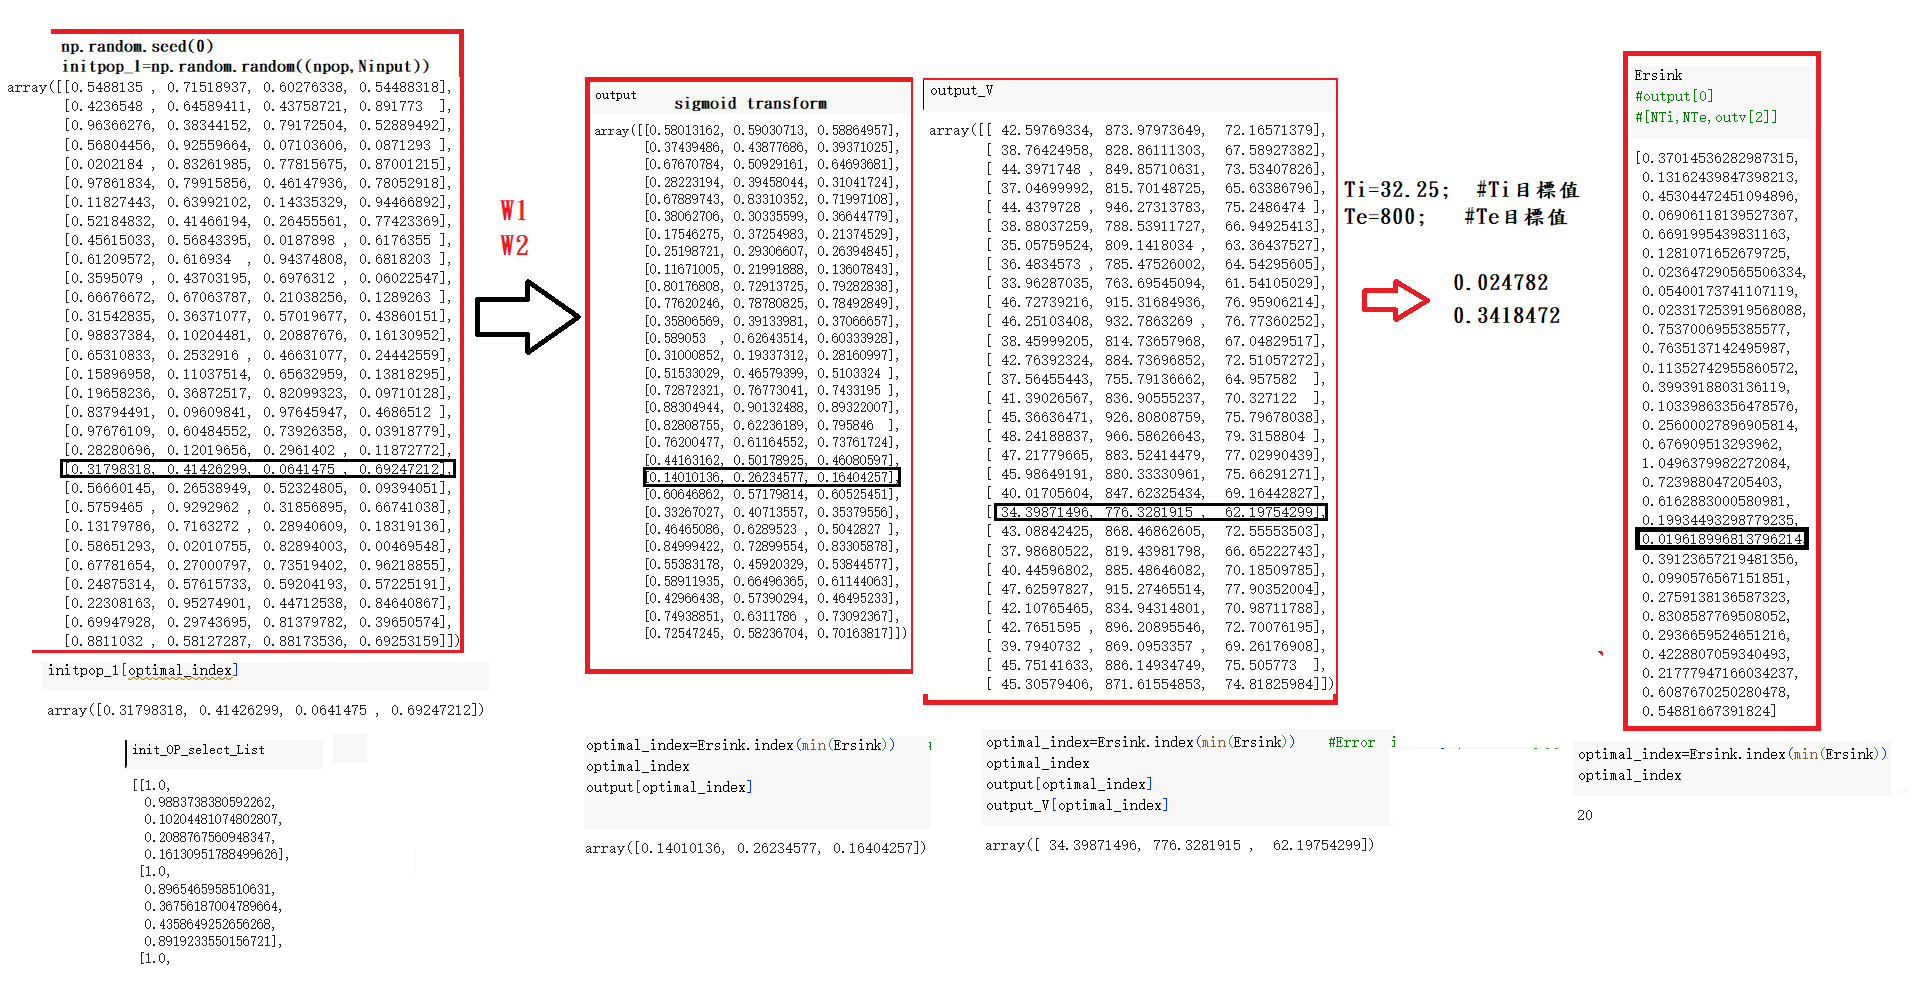

In [ ]:
np.random.seed(0)
import pandas as pd
import numpy as np
import copy
init_OP_select_List=[]
GolErsink_List_G=[]




#max_min_Xi[0][:Ninput]
#np.ptp(max_min_Xi,axis=0)[:Ninput]
max_min_Xi
max_min_Xi=np.array([[3.60000000e+02, 5.00000000e-01, 1.28000000e+02, 5.50000000e-01,5.04210000e+01, 9.95967100e+02, 8.18226703e+01],
 [1.80000000e+02, 3.00000000e-01, 6.40000000e+01, 3.50000000e-01,3.17882400e+01, 6.98213900e+02, 5.83464421e+01]])
#max_min_Xi[1][:Ninput]
#np.ptp(max_min_Xi,axis=0)[:Ninput]

i=0
while i < npop:  #npop
  initpop_1=np.random.random((npop,Ninput))
  initpop_T=initpop_1*np.ptp(max_min_Xi,axis=0)[:Ninput]+max_min_Xi[1][:Ninput]

  intones=np.ones((npop,1))
  initpop=np.insert(initpop_1, 0, 1, axis=1)

  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)

  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*np.ptp(max_min_Xi,axis=0)[4:]+max_min_Xi[1][Ninput:]

  #df = pd.DataFrame(output_V)
  #df.to_csv("output_V.csv")


  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index_G=Ersink.index(min(Ersink))  #Error is minimal index
  GolErsink_List_G.append(Ersink[optimal_index_G])
  Ainitpop=initpop[optimal_index_G]
  #init_OP_select_List=Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()
  init_OP_select_List.append(Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()[0])
  i +=1

a=np.array(GolErsink_List_G)
stsv_G, meanv_G, minv_G, maxv_G =np.std(a) ,np.mean(a) ,np.min(a) ,np.max(a)

print(optimal_index_G)
print(Ainitpop)
print(init_OP_select_List) #隨機找出 npop組 最佳組合
print(GolErsink_List_G)
print("隨機npop組標準差與最小值:",stsv_G,"  ",minv_G)
print(GolErsink_List_G.index(max(GolErsink_List_G)))
GolErsink_max_index=GolErsink_List_G.index(max(GolErsink_List_G))


0
[1.         0.97573503 0.13253098 0.85142268 0.78172309]
[[1.0, 0.8379449074988039, 0.09609840789396307, 0.9764594650133958, 0.4686512016477016], [1.0, 0.7252542798196405, 0.5013243819267023, 0.9560836347232239, 0.6439901992296374], [1.0, 0.7255943642105788, 0.011427458625031028, 0.7705807485027762, 0.14694664540037505], [1.0, 0.8577226441935546, 0.45722345335385706, 0.9518744768327362, 0.5757511620448724], [1.0, 0.6188261682413765, 0.13346147093493443, 0.9805801327872824, 0.8717857347554929], [1.0, 0.959142251977975, 0.10329815508513862, 0.8671671591051991, 0.029190234848913255], [1.0, 0.5964330653496227, 0.11752564290363765, 0.9758838684185334, 0.9325612038573404], [1.0, 0.9804856634690068, 0.09645086069738418, 0.8634706491935857, 0.5665061069891627], [1.0, 0.9222985036674477, 0.49236140669088413, 0.8738321783347182, 0.8339816438766318], [1.0, 0.5220624206822644, 0.03516005971619418, 0.9062314197872842, 0.8163643055198561], [1.0, 0.9717630761139511, 0.3638447750916378, 0.7879157509

In [ ]:
Ersink
print(min(GolErsink_List_G))
print(GolErsink_List_G.index(min(GolErsink_List_G)))
GolErsink_List_G[24]
#init_OP_select_List_G
maxv_G
minv_G

0.09011712970427714
24


0.09011712970427714

In [ ]:

#df = pd.DataFrame(init_OP_select_List)
#df.to_csv("init_OP_select_List.csv")

init_OP_select_List

[[1.0,
  0.8379449074988039,
  0.09609840789396307,
  0.9764594650133958,
  0.4686512016477016],
 [1.0,
  0.7252542798196405,
  0.5013243819267023,
  0.9560836347232239,
  0.6439901992296374],
 [1.0,
  0.7255943642105788,
  0.011427458625031028,
  0.7705807485027762,
  0.14694664540037505],
 [1.0,
  0.8577226441935546,
  0.45722345335385706,
  0.9518744768327362,
  0.5757511620448724],
 [1.0,
  0.6188261682413765,
  0.13346147093493443,
  0.9805801327872824,
  0.8717857347554929],
 [1.0,
  0.959142251977975,
  0.10329815508513862,
  0.8671671591051991,
  0.029190234848913255],
 [1.0,
  0.5964330653496227,
  0.11752564290363765,
  0.9758838684185334,
  0.9325612038573404],
 [1.0,
  0.9804856634690068,
  0.09645086069738418,
  0.8634706491935857,
  0.5665061069891627],
 [1.0,
  0.9222985036674477,
  0.49236140669088413,
  0.8738321783347182,
  0.8339816438766318],
 [1.0,
  0.5220624206822644,
  0.03516005971619418,
  0.9062314197872842,
  0.8163643055198561],
 [1.0,
  0.9717630761139511,

In [ ]:
Ersink[optimal_index].tolist()
#GolErsink_List.append(Ersink[optimal_index])
#GolErsink_List[0]
#init_OP_select_List
#GolErsink_List
optimal_index
Ersink[optimal_index]
stsv
meanv
minv

0.09011712970427714

In [ ]:
np.random.seed(0)
#np.random.seed()
population_size=npop #int(input('Please input the size of population: ') or 30) # default value is 30 # 染色體數量
crossover_rate=0.8 #float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8  交配率 npop中隨機選2組 作交配
mutation_rate=0.2 #float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2 # 突變率：染色體要不要突變
mutation_selection_rate=0.2 #float(input('Please input the mutation selection rate: ') or 0.2) # 突變選擇率：選幾個基因位置交換
num_gene=Ninput
num_mutation_jobs=round(num_gene*mutation_selection_rate) # round四捨五入 2個基因要換
num_iteration=100 #int(input('Please input number of iteration: ') or 1) # default value is 30000 # 交配幾次, 迴圈幾遍


population_list=init_OP_select_List
parent_list=copy.deepcopy(population_list)
offspring_list=copy.deepcopy(population_list)


#parent_list
S=list(np.random.permutation(population_size)) #0-npop 亂數排列
int(population_size/2)

15

In [ ]:
offspring_list[5]
#init_OP_select_List
#population_list
population_list

[[1.0,
  0.8738902702221241,
  0.06679216402653765,
  0.7342434347824954,
  0.31765886026928225],
 [1.0,
  0.8397398780789136,
  0.15936347169018072,
  0.9336258944198716,
  0.47689277776665784],
 [1.0,
  0.6917867308195961,
  0.2781960796714099,
  0.6603301971434251,
  0.12387077253084922],
 [1.0,
  0.9483379571939666,
  0.7787000448874519,
  0.8753081498799665,
  0.8656271160917814],
 [1.0,
  0.873740946537294,
  0.9194051250473763,
  0.9977223710852099,
  0.7934892266561452],
 [1.0,
  0.8723279699493359,
  0.27962146915339425,
  0.7147205303705768,
  0.2550639759348561],
 [1.0,
  0.7149408179107202,
  0.7575604224520988,
  0.6275374911731572,
  0.05544630371597559],
 [1.0,
  0.8778266392181836,
  0.09612902714655336,
  0.9103776984808558,
  0.44097257272626567],
 [1.0,
  0.9654638104514565,
  0.04725830066119918,
  0.913976990921623,
  0.6282073188195244],
 [1.0,
  0.7467695091759063,
  0.29834145625880526,
  0.928754816059744,
  0.6704945657665538],
 [1.0,
  0.9173349366540983,
  0

In [ ]:
df = pd.DataFrame(offspring_list)
df.to_csv("offspring_list.csv")
S
num_mutation_jobs

1

In [ ]:

df = pd.DataFrame(population_list)
df.to_csv("population_list.csv")
population_list

In [ ]:
m_chg=[]

if  m_chg:
  print("empty")

In [ ]:
for i in range(3):
  print("i=",i,"  std=",stsv_G)


  '''----------crossover-------------'''

  parent_list=copy.deepcopy(population_list)
  offspring_list=copy.deepcopy(population_list)



  for m in range(int(population_size/2)):
  #for m in range(1):
  #  m=5

    crossover_prob=np.random.rand() # 去生出一個機率
  #  print("Crossover Rate=",crossover_rate,"  crossover_prob=",crossover_prob)#, file = sourceFile)
  #  print(S[2*m],S[2*m+1]) #5 16
  #  print(population_list[S[2*m]][1:]) #[0.959142251977975, 0.10329815508513862, 0.8671671591051991, 0.029190234848913255]
  #  print(population_list[S[2*m+1]][1:]) #[0.9634699947451857, 0.3049641829577222, 0.9414392916839432, 0.0756106730650844]
    if crossover_rate>=crossover_prob: # 如果產出的機率在0-0.8之間就可以交配
        parent_1= population_list[S[2*m]][1:]
        parent_2= population_list[S[2*m+1]][1:] # 都是拿經過Ｓ對應的兩條（隔壁）染色體出來後，選裡面所有基因



        child_1=parent_1[:]
        child_2=parent_2[:]
        cutpoint=list(np.random.choice(num_gene+1, 2, replace=False)) #在0至num_gene間隨機取2個值,使切成三段，



        #若 cutpoint=[10,20]則原offspring_list=[0,1,2.....34,35,36] 將切成0~10,11~19,20~36三段
        cutpoint.sort()

    #      print(S[2*m],S[2*m+1]," cutpoint=",cutpoint, file = sourceFile)

        child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
        child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]  # 兩刀中間段交換
        offspring_list[S[2*m]][1:]=child_1[:] #offspring_list(5)
        offspring_list[S[2*m+1]][1:]=child_2[:] #offspring_list(16)
  #      print(cutpoint) # [1, 3]
  #      print(offspring_list[S[2*m]][1:])
  #      print(offspring_list[S[2*m+1]][1:])
        '''--------mutatuon--------'''
    else:
        parent_1= population_list[S[2*m]][1:]
        parent_2= population_list[S[2*m+1]][1:] # 都是拿經過Ｓ對應的兩條（隔壁）染色體出來後，選裡面所有基因

        child_1=parent_1[:]
        child_2=parent_2[:]


        m_chg=list(np.random.choice(num_gene, round(np.random.rand()*num_gene), replace=False))
        m_chg.sort()
        #print(m_chg)
        #m_chg=list(np.random.choice(num_gene, 3, replace=False))
        if m_chg:
          for m in m_chg:
#            print(m)
            child_1[m]=(1-parent_1[m])*0.95
            child_2[m]=(1-parent_2[m])*0.95  #
          offspring_list[S[2*m]][1:]=child_1[:] #
          offspring_list[S[2*m+1]][1:]=child_2[:] #

  initpop=np.array(offspring_list)
  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)

  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*np.ptp(max_min_Xi,axis=0)[4:]+max_min_Xi[1][Ninput:]

  #df = pd.DataFrame(output_V)
  #df.to_csv("output_V.csv")


  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

  a=np.array(Ersink)
  stsv, meanv, minv, maxv=np.std(a) ,np.mean(a) ,np.min(a) ,np.max(a)
  #print("隨機npop組標準差與最小值:",stsv,"  ",minv)
  #print(min(Ersink))
  #print(Ersink.index(min(Ersink)))


  if (minv < maxv_G ):

    population_list[GolErsink_max_index]=initpop[optimal_index]
    GolErsink_List_G[GolErsink_max_index]=Ersink[optimal_index]

    stsv_G, meanv_G, minv_G =np.std(GolErsink_List_G) ,np.mean(GolErsink_List_G) ,np.min(GolErsink_List_G)
    #print("min=",minv_G,minv)
    #print("std=",stsv_G,stsv)
  #offspring_list=copy.deepcopy(population_list)

i= 0   std= 0.01578667334773403
i= 1   std= 0.01566111326128348
i= 2   std= 0.016011896996144397


In [ ]:
GolErsink_List_G[GolErsink_max_index]

0.1504093122403502

In [ ]:
 for m in range(1):
    m=6

    crossover_prob=np.random.rand() # 去生出一個機率
  #  print("Crossover Rate=",crossover_rate,"  crossover_prob=",num_mutation_jobs)#, file = sourceFile)
  #  print(S[2*m],S[2*m+1]) #5 16
  #  print(population_list[S[2*m]][1:]) #[0.959142251977975, 0.10329815508513862, 0.8671671591051991, 0.029190234848913255]
  #  print(population_list[S[2*m+1]][1:]) #[0.9634699947451857, 0.3049641829577222, 0.9414392916839432, 0.0756106730650844]
    if crossover_rate>=crossover_prob: # 如果產出的機率在0-0.8之間就可以交配
        parent_1= population_list[S[2*m]][1:]
        parent_2= population_list[S[2*m+1]][1:] # 都是拿經過Ｓ對應的兩條（隔壁）染色體出來後，選裡面所有基因



        child_1=parent_1[:]
        child_2=parent_2[:]
        cutpoint=list(np.random.choice(num_gene+1, 2, replace=False)) #在0至num_gene間隨機取2個值,使切成三段，



        #若 cutpoint=[10,20]則原offspring_list=[0,1,2.....34,35,36] 將切成0~10,11~19,20~36三段
        cutpoint.sort()

    #      print(S[2*m],S[2*m+1]," cutpoint=",cutpoint, file = sourceFile)

        child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
        child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]  # 兩刀中間段交換
        offspring_list[S[2*m]][1:]=child_1[:] #offspring_list(5)
        offspring_list[S[2*m+1]][1:]=child_2[:] #offspring_list(16)
  #      print(cutpoint) # [1, 3]
  #      print(offspring_list[S[2*m]][1:])
  #      print(offspring_list[S[2*m+1]][1:])

In [ ]:
child_2

[0.7890378914618652, 0.144240102021566, 0.8738321783347182, 0.6615776482298339]

In [ ]:

m_chg=list(np.random.choice(num_gene, round(np.random.rand()*num_gene), replace=False))
m_chg.sort()
print(m_chg)





[]


In [ ]:
for i in range(5):

  initpop=np.array(offspring_list)
  #GolErsink_List=[]
  i=0
  #while i < npop:  #npop

  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)

  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*np.ptp(max_min_Xi,axis=0)[4:]+max_min_Xi[1][Ninput:]

  #df = pd.DataFrame(output_V)
  #df.to_csv("output_V.csv")


  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

  a=np.array(Ersink)
  stsv, meanv, minv =np.std(a) ,np.mean(a) ,np.min(a)
  print("隨機npop組標準差與最小值:",stsv,"  ",minv,"  ",minv_G)
  #print(min(Ersink))
  print(Ersink.index(min(Ersink)))
  if (minv < minv_G ):
    population_list[optimal_index_G]=initpop[optimal_index]
    GolErsink_List_G[optimal_index_G]=Ersink[optimal_index]
    stsv_G, meanv_G, minv_G =np.std(GolErsink_List_G) ,np.mean(GolErsink_List_G) ,np.min(GolErsink_List_G)
    print(stsv_G)

隨機npop組標準差與最小值: 0.019926136992800502    0.09090023394030658    0.0899149877101191
18
隨機npop組標準差與最小值: 0.019926136992800502    0.09090023394030658    0.0899149877101191
18
隨機npop組標準差與最小值: 0.019926136992800502    0.09090023394030658    0.0899149877101191
18
隨機npop組標準差與最小值: 0.019926136992800502    0.09090023394030658    0.0899149877101191
18
隨機npop組標準差與最小值: 0.019926136992800502    0.09090023394030658    0.0899149877101191
18


In [ ]:
population_list

In [ ]:
initpop[optimal_index]
#population_list


array([1.        , 0.96813109, 0.17344335, 0.89804476, 0.32628141])

In [ ]:
population_list

In [ ]:
initpop[optimal_index]
optimal_index


15

In [ ]:
num_gene

4

In [ ]:
'''--------mutatuon--------'''
m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False))
#m_chg=list(np.random.choice(num_gene, 3, replace=False))
m_chg


[1]

In [ ]:
print(np.random.choice(10,2))

[4 2]


In [ ]:
i=1

while i < npop:  #npop
  initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
  for j in range(npop-1):
    xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
    initpop_T =np.append(initpop_T,xx, axis=0)
  initpop_1=(initpop_T-max_min_Xi[1][:Ninput])/(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])
  intones=np.ones((npop,1))
  initpop=np.insert(initpop_1, 0, 1, axis=1)

  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)
  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]

  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

  optimal_V=output[optimal_index]*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
  #print(optimal_index)
  Ainitpop=initpop[optimal_index]       #array([1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ])
  init_OP_select_List.append(Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()[0])
  i +=1
#print(Ersink)
a=np.array(Ersink)
stsv, meanv, minv =np.std(a) ,np.mean(a) ,np.min(a)

In [ ]:
np.array(init_OP_select_List)

In [ ]:
offspring_list

NameError: name 'offspring_list' is not defined

In [ ]:
parent_1

[0.9360590205048065,
 0.029435237061361252,
 0.1009762797205438,
 0.4206470170337188]

In [ ]:
population_list[10]

[1.0,
 0.9382561369639623,
 0.2445696090205629,
 0.458212259758612,
 0.7574065558217261]

In [ ]:
population_list[27]

[1.0,
 0.9360590205048065,
 0.029435237061361252,
 0.1009762797205438,
 0.4206470170337188]

In [ ]:
cutpoint

[0, 2]

In [ ]:
offspring_list[S[2*m]][1:]=child_1[:]
offspring_list[S[2*m]]

[1.0,
 0.9382561369639623,
 0.029435237061361252,
 0.1009762797205438,
 0.4206470170337188]

In [ ]:
Ersink=[]
for outv in output:
  SA=np.power(outv-[NTi,NTe,outv[2]],2)
  SA=np.sum(SA)
  Ersink=list(np.append(Ersink,SA))

In [ ]:
Ersink
#output[0]
#[NTi,NTe,outv[2]]
#initpop_1[optimal_index]

In [ ]:
optimal_index=Ersink.index(min(Ersink))  #Error is minimal index
optimal_index
#output[optimal_index]


20

In [ ]:
Ainitpop=initpop[optimal_index]
init_OP_select_List=Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()  #array([[1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ]])
print(init_OP_select_List)


[[1.0, 0.317983179393976, 0.41426299451466997, 0.06414749634878436, 0.6924721193700198]]


In [ ]:
                                     #30 Size of the population
matpop = np.zeros([npop,Ninput+numTag]);                         #array([[0., 0., 0., 0., 0., 0., 0.],
                                              #    [0., 0., 0., 0., 0., 0., 0.],
matp=matpop;
crossProb = 0.7;                                    # Probability of crossover
crossprob=crossProb;
mutProb = 0.02;                                    # 0.02Probability of mutation
mutprob = mutProb;                                  # Probability of mutation
p_tour = 0.7;                                     # Tournament probability
mut_scale = 0.1;                                    # 0.1 Scale for mutations
low_value = 1000;
up_value = -1e8;
ga_ok = 0;

In [ ]:
#
np.random.seed(0)
initpop_1=np.random.random((npop,Ninput))
initpop_T1=initpop_1*(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])+max_min_Xi[1][:Ninput]
print(initpop_T1[0][0])

278.78643070691845


In [ ]:
matpop

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
 

[matpop](https://drive.google.com/file/d/1K3YWozV725Ve73NV8tNzouWfeyBNhbpm/view?usp=drive_link)

In [ ]:
#
initp = np.zeros([npop,Ninput]); # (30,4)
chk_pop=np.zeros([npop,1]); #(30,1)
j=1;
dj=1;

[initp_chk_pop](https://drive.google.com/file/d/1FkGDranBLKi1Ida2821T01mOMkfKuuCv/view?usp=drive_link)

In [ ]:
#
max_min_Xi[1][:Ninput]

array([180.  ,   0.3 ,  64.  ,   0.35])

In [ ]:
np.random.seed()
initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
initpop_T

array([[286.11798821,   0.46833873, 117.56413195,   0.51601552]])

In [ ]:
#
(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])

array([180. ,   0.2,  64. ,   0.2])

In [ ]:
#
np.ptp(max_min_Xi,axis=0)[0:Ninput]

array([180. ,   0.2,  64. ,   0.2])

In [ ]:
#
np.random.rand(1,Ninput)

array([[0.4173048 , 0.55868983, 0.14038694, 0.19810149]])

In [ ]:
#
np.random.rand(1,Ninput)[0]

array([0.21162812, 0.26554666, 0.49157316, 0.05336255])

In [ ]:
np.random.seed(0)

init_OP_select_List=[]

In [ ]:
#
for j in range(npop-1):
  xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
  initpop_T=np.append(initpop_T,xx, axis=0)

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

In [ ]:
Ersink

NameError: name 'Ersink' is not defined

In [ ]:
#
np.random.seed(0)
initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
for j in range(npop-1):
  xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
  initpop_T =np.append(initpop_T,xx, axis=0)

In [ ]:
np.random.rand(1,Ninput)

array([[0.16249293, 0.61555956, 0.12381998, 0.84800823]])

In [ ]:
initpop_T

In [ ]:
init_OP_select_List

In [ ]:
outv

array([0.58013162, 0.59030713, 0.58864957])

In [ ]:
[NTe,NTi,outv[2]]

[0.3418472076874406, 0.02478215787677197, 0.5886495724056465]

In [ ]:
Ersink=[]
for outv in output:
  SA=np.power(outv-[NTe,NTi,outv[2]],2)
  SA=np.sum(SA)
  Ersink=list(np.append(Ersink,SA))


0.02478215787677197

In [ ]:
Ersink=[]
for outv in output:
  SA=np.power(outv-[NTe,NTi,outv[2]],2)
  SA=np.sum(SA)
  Ersink=list(np.append(Ersink,SA))
Ersink

In [ ]:
np.random.seed(0)
init_OP_select_List=[]
i=0
while i < npop:  #npop
  initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],

  for j in range(npop-1):
    xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
    initpop_T =np.append(initpop_T,xx, axis=0)
  initpop_1=(initpop_T-max_min_Xi[1][:Ninput])/(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])

  intones=np.ones((npop,1))
  initpop=np.insert(initpop_1, 0, 1, axis=1)

  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)
  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

  optimal_V=output[optimal_index]*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
  Ainitpop=initpop[optimal_index]       #array([1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ])
  init_OP_select_List.append(Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()[0])
  i +=1




In [ ]:
init_OP_select_List

In [ ]:
###########
# np.random.seed()

# init_OP_select_List=[]


# initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
# for j in range(npop-1):
#  xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
#  initpop_T =np.append(initpop_T,xx, axis=0)
# initpop_T=initpop_T1
# initpop_1=(initpop_T-max_min_Xi[1][:Ninput])/(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])
########

# 亂數產生npop組
np.random.seed(0)
initpop_1=np.random.random((npop,Ninput))
initpop_T=initpop_1*(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])+max_min_Xi[1][:Ninput]



intones=np.ones((npop,1))
initpop=np.insert(initpop_1, 0, 1, axis=1)

hid=initpop@W1.T
hid_sig=sigmoid(hid,deriv=False)
H1=np.insert(hid_sig, 0, 1, axis=1)
output=sigmoid(H1@W2.T,deriv=False)
output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]



Ersink=[]
for outv in output:
  SA=np.power(outv-[NTi,NTe,outv[2]],2)
  SA=np.sum(SA)
  Ersink=list(np.append(Ersink,SA))

optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

optimal_V=output[optimal_index]*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
#print(optimal_index)
Ainitpop=initpop[optimal_index]       #array([1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ])
init_OP_select_List=Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()  #array([[1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ]])
#print(init_OP_select_List)


i=1

while i < npop:  #npop
  initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
  for j in range(npop-1):
    xx=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])
    initpop_T =np.append(initpop_T,xx, axis=0)
  initpop_1=(initpop_T-max_min_Xi[1][:Ninput])/(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])
  intones=np.ones((npop,1))
  initpop=np.insert(initpop_1, 0, 1, axis=1)

  hid=initpop@W1.T
  hid_sig=sigmoid(hid,deriv=False)
  H1=np.insert(hid_sig, 0, 1, axis=1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]

  Ersink=[]
  for outv in output:
    SA=np.power(outv-[NTi,NTe,outv[2]],2)
    SA=np.sum(SA)
    Ersink=list(np.append(Ersink,SA))

  optimal_index=Ersink.index(min(Ersink))  #Error is minimal index

  optimal_V=output[optimal_index]*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
  #print(optimal_index)
  Ainitpop=initpop[optimal_index]       #array([1.        , 0.04354147, 0.76963663, 0.66655643, 0.4953548 ])
  init_OP_select_List.append(Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()[0])
  i +=1
#print(Ersink)
a=np.array(Ersink)
stsv, meanv, minv =np.std(a) ,np.mean(a) ,np.min(a)
#----------------
print(stsv, meanv, minv)

init_OP_select_Array=np.array(init_OP_select_List)

initpop=init_OP_select_Array

hid=initpop@W1.T
hid_sig=sigmoid(hid,deriv=False)
H1=np.insert(hid_sig, 0, 1, axis=1)
output=sigmoid(H1@W2.T,deriv=False)
output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
input_V=(init_OP_select_Array[:,1:]*(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput]))+max_min_Xi[1][:Ninput]
output_V




0.3579386607311256 0.34600220501164713 0.036480273056569895


array([[ 37.56455443, 755.79136662,  64.95758202],
       [ 37.90978179, 767.03235681,  65.55072718],
       [ 32.7642042 , 738.39538179,  59.85726084],
       [ 36.12323233, 755.52866699,  63.60088338],
       [ 36.89513775, 758.81328973,  64.40652374],
       [ 34.75260508, 728.58039072,  61.68333754],
       [ 36.19019225, 740.22550013,  63.28886568],
       [ 36.17990891, 773.90177191,  64.03106196],
       [ 35.86571268, 770.51414748,  63.6536375 ],
       [ 36.95014036, 764.89363063,  64.59550645],
       [ 38.68951369, 770.9344029 ,  66.37668414],
       [ 35.39903215, 746.57544375,  62.71504811],
       [ 35.20493901, 744.40653629,  62.48403106],
       [ 37.43931955, 757.52541149,  64.88490492],
       [ 34.11661649, 723.84888453,  60.98965984],
       [ 36.74217267, 765.64073547,  64.41420831],
       [ 35.4201847 , 743.29763649,  62.66177714],
       [ 35.78430015, 743.59301935,  63.00541914],
       [ 36.84708466, 752.50047591,  64.20943103],
       [ 36.89854954, 759.54574

In [ ]:
initpop

array([[1.        , 0.98837384, 0.10204481, 0.20887676, 0.16130952],
       [1.        , 0.8965466 , 0.36756187, 0.43586493, 0.89192336],
       [1.        , 0.24082878, 0.10029394, 0.01642963, 0.92952932],
       [1.        , 0.78323444, 0.2883985 , 0.24141862, 0.66250457],
       [1.        , 0.96779467, 0.5468849 , 0.27482357, 0.59223042],
       [1.        , 0.97049369, 0.13343943, 0.09680395, 0.34339173],
       [1.        , 0.91486309, 0.04934895, 0.29288857, 0.7150526 ],
       [1.        , 0.87602685, 0.91854645, 0.12012018, 0.33447374],
       [1.        , 0.70494806, 0.41863686, 0.00531005, 0.01135513],
       [1.        , 0.94782189, 0.72855873, 0.32965116, 0.79176142],
       [1.        , 0.93825614, 0.24456961, 0.45821226, 0.75740656],
       [1.        , 0.89863767, 0.53717013, 0.20018989, 0.67365327],
       [1.        , 0.98046646, 0.58866215, 0.04551071, 0.1979828 ],
       [1.        , 0.92906616, 0.05352962, 0.18162239, 0.11222432],
       [1.        , 0.8996517 , 0.

In [ ]:
Ersink
Ainitpop
Ainitpop.shape[0]
#init_OP_select_List.append(Ainitpop.reshape(1,Ainitpop.shape[0]).tolist()[0])
init_OP_select_Array

array([[1.        , 0.98837384, 0.10204481, 0.20887676, 0.16130952],
       [1.        , 0.8965466 , 0.36756187, 0.43586493, 0.89192336],
       [1.        , 0.24082878, 0.10029394, 0.01642963, 0.92952932],
       ...,
       [1.        , 0.77655367, 0.16752543, 0.00187785, 0.11257968],
       [1.        , 0.94394855, 0.14388032, 0.16884677, 0.2278726 ],
       [1.        , 0.99845411, 0.27739505, 0.23103634, 0.30162465]])

In [ ]:
df = pd.DataFrame(output_V)
df.to_csv("output_V.csv")

In [ ]:
output_V

array([[ 37.56455443, 755.79136662,  64.95758202],
       [ 37.90978179, 767.03235681,  65.55072718],
       [ 32.7642042 , 738.39538179,  59.85726084],
       ...,
       [ 34.93584362, 744.28207879,  62.22335257],
       [ 36.72114577, 750.12170121,  64.03455948],
       [ 37.35693407, 756.40983498,  64.78065823]])

In [ ]:
(init_OP_select_Array[:,1:]*(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput]))+max_min_Xi[1][:Ninput]


array([[3.45847439e+02, 3.71201165e-01, 8.60433062e+01, 5.15662055e-01],
       [3.35657452e+02, 3.26697970e-01, 6.41114133e+01, 3.67260974e-01],
       [3.49554148e+02, 3.25673263e-01, 8.92462994e+01, 4.68447952e-01],
       [3.52381946e+02, 3.31339661e-01, 7.69752010e+01, 4.28605283e-01],
       [3.31483262e+02, 4.57192503e-01, 7.59269722e+01, 5.02313884e-01],
       [3.36152724e+02, 3.36798953e-01, 8.29308699e+01, 5.05971369e-01],
       [3.45740383e+02, 3.42330121e-01, 7.38601917e+01, 4.64713554e-01],
       [3.52116086e+02, 4.98182436e-01, 7.90273691e+01, 5.41184193e-01],
       [2.92978320e+02, 3.08583222e-01, 7.87939491e+01, 5.30150336e-01],
       [3.49269323e+02, 4.52186516e-01, 7.83956388e+01, 5.07625757e-01],
       [3.58891092e+02, 3.21813499e-01, 6.90310340e+01, 3.58923068e-01],
       [3.21609893e+02, 3.24605570e-01, 7.61527398e+01, 4.73040822e-01],
       [3.39959601e+02, 3.07814435e-01, 7.89350931e+01, 4.66569910e-01],
       [3.37338573e+02, 3.16950168e-01, 8.41367898e

In [ ]:
stsv,meanv, minv


(0.2815224671683419, 0.377157720963959, 0.030940949766128004)

In [ ]:
import numpy as np
aa= np.zeros((1,8))
bb=np.ones((3,8))
c = np.append(aa,bb,axis = 0)
print(c)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
max_min_Xi[1][:4]+((max_min_Xi[0][:4])-max_min_Xi[1][:4])* np.random.rand(1,4)

array([[183.50129444,   0.42292594,  76.24820668,   0.41752924]])

In [ ]:
import numpy as np
np.arange(npop).tolist()
num_job=5

In [ ]:
np.arange(npop).tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
population_size=int(input('Please input the size of population: ') or 30) # default value is 30
crossover_rate=float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8
mutation_rate=float(input('Please input the size of Mutation Rate: ') or 0.1) # default value is 0.1
mutation_selection_rate=float(input('Please input the mutation selection rate: ') or 0.5)
num_mutation_jobs=round(num_job*mutation_selection_rate)
num_iteration=int(input('Please input number of iteration: ') or 2000) # default value is 2000

Please input the size of population: 
Please input the size of Crossover Rate: 
Please input the size of Mutation Rate: 
Please input the mutation selection rate: 
Please input number of iteration: 


In [ ]:
import numpy as np
import math
import random
print(random.randint(2,20))    # 7

r2a=random.sample(np.arange(npop).tolist(), k=2)
print(r2a)
#input_V(r2a)

20
[20, 17]


In [ ]:
input_V

array([[3.50721066e+02, 4.38460320e-01, 6.79768487e+01, 4.00407676e-01],
       [3.48200190e+02, 4.12613825e-01, 7.50397941e+01, 4.93339595e-01],
       [3.52817888e+02, 3.11434640e-01, 7.44035498e+01, 3.74568040e-01],
       [3.55709610e+02, 4.44710098e-01, 7.08733680e+01, 4.40881806e-01],
       [3.52344439e+02, 3.79816375e-01, 7.48372942e+01, 4.75358862e-01],
       [3.58981029e+02, 4.57829543e-01, 7.84729665e+01, 4.51664614e-01],
       [3.53386590e+02, 3.22108985e-01, 8.64087743e+01, 5.44186913e-01],
       [3.45169834e+02, 4.24318747e-01, 6.86436361e+01, 4.53689168e-01],
       [2.88248866e+02, 3.15315830e-01, 7.87809722e+01, 4.70024774e-01],
       [3.10070317e+02, 3.15526291e-01, 8.20006406e+01, 4.38144817e-01],
       [3.31179151e+02, 4.10988927e-01, 7.13646339e+01, 5.15209609e-01],
       [3.52047656e+02, 3.55986567e-01, 7.56183581e+01, 4.85056686e-01],
       [3.55714012e+02, 3.79963380e-01, 7.11609060e+01, 4.90535141e-01],
       [3.49346473e+02, 3.42651259e-01, 8.45286324e

In [ ]:
r2a[1]

17

In [ ]:
from random import seed
from random import random

# seed random number generator
seed(1)
print(random(), random(), random())

0.13436424411240122 0.8474337369372327 0.763774618976614


In [ ]:

# choose a random element from a list
from random import seed
from random import choice
# seed random number generator
seed()
# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)
# make choices from the sequence
for _ in range(3):
 selection = choice(sequence)
 print(selection)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
19
12
12


In [ ]:
import
Tbest=999999999999999
best_list,best_obj=[],[]
population_list=[]
population_size=30 # (npop)
num_job=20 # number of jobs (Ninput)
for i in range(population_size):
    random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
    population_list.append(random_num) # add to the population_list2.

NameError: ignored

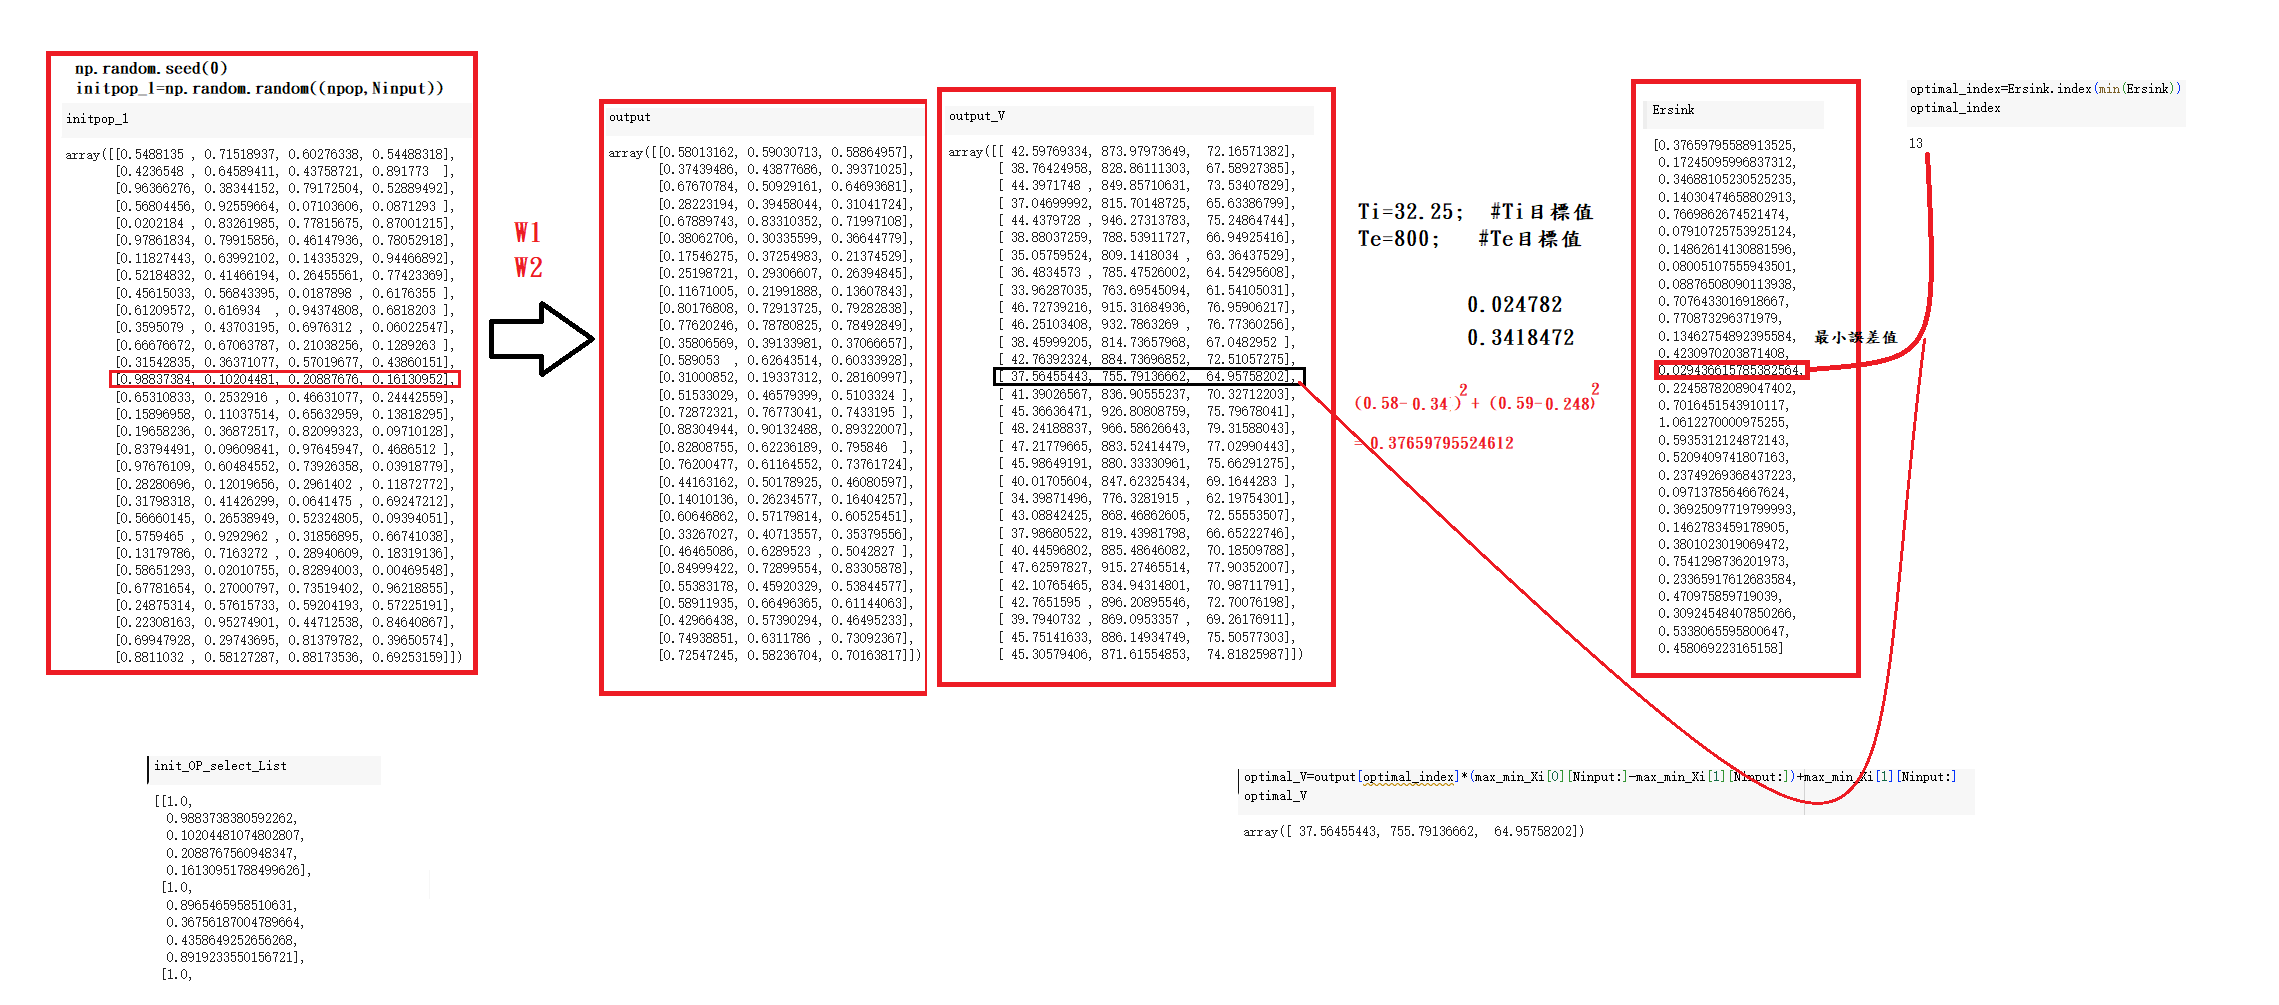

In [ ]:
import pandas as pd
import numpy as np
url ="/content/drive/MyDrive/Colab Notebooks/BP/W1.csv"
W1 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
url ="/content/drive/MyDrive/Colab Notebooks/BP/W2.csv"
W2 = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
url ="/content/drive/MyDrive/Colab Notebooks/BP/max_min_Xi.csv"
max_min_Xi = np.array(pd.read_csv(url,encoding='utf-8'))[:,1:]
hidden_node=W1.shape[0]
Ninput=W1.shape[1]-1
numTag=W2.shape[0]



def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))





genNr =9000 ; #93000;      Number of generations


Te=800;
Ti=50.25;

NTe=(Te-max_min_Xi[1][5])/(max_min_Xi[0][5]-max_min_Xi[1][5]);    #Constrant
NTi=(Ti-max_min_Xi[1][4])/(max_min_Xi[0][4]-max_min_Xi[1][4]);
ptp_Xi=np.ptp(max_min_Xi,axis=0)
Nmax_min=(max_min_Xi- np.min(max_min_Xi,axis=0))/ptp_Xi




#initp random choice number of (npop) set, that was satisfy boundary condition
dj=1;
initp=[]
while dj < npop+1:
  initpop_T=np.array([max_min_Xi[1][:Ninput]+(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])* np.random.rand(1,Ninput)[0]])  #array([[1.81503680e+02, 4.06155318e-01, 1.14389608e+02, 5.15278503e-01],
  initpop_1=(initpop_T-max_min_Xi[1][:Ninput])/(max_min_Xi[0][:Ninput]-max_min_Xi[1][:Ninput])
  #intones=np.ones((npop,1))
  initpop=np.insert(initpop_1, 0, 1, axis=1)
  hid=initpop[0]@W1.T
  hid_sig=sigmoid(hid,deriv=False)
  H1=np.insert(hid_sig, 0, 1)
  output=sigmoid(H1@W2.T,deriv=False)
  output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]

  #set the boundary condition
  #print(output_V)
  if (output[0] < NTi) and (output[1] < NTe) :
    initp.append(list(initpop_1[0]))
    dj +=1

initpop=np.insert(initp, 0, 1, axis=1)
hid=initpop@W1.T
hid_sig=sigmoid(hid,deriv=False)
H1=np.insert(hid_sig, 0, 1, axis=1)
output=sigmoid(H1@W2.T,deriv=False)
output_V=output*(max_min_Xi[0][Ninput:]-max_min_Xi[1][Ninput:])+max_min_Xi[1][Ninput:]
print(output_V)